In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [11]:
T_init = 20.0 
T_left = 100.0
T_bot = 100.0 

In [12]:
L = 0.01
W = 0.01

nx = 21
ny = 21


dx = L / (nx-1)
dy = L / (ny-1)

In [13]:
x = numpy.linspace(0.0,L,nx)
y = numpy.linspace(0.0,W,ny)

In [14]:
alpha = 1e-4

In [15]:
T0 = numpy.full((ny,nx), 20.0)
T0[0,:] = 100.0
T0[:,0] = 100.0

In [19]:
def ftcs(T0, nt, dt, dx, dy, alpha, qx = 0.0, qy = 0.0):
    T = T0.copy()
    sigmax = alpha * dt / dx**2
    sigmay = alpha * dt / dy**2
    ny, nx = T.shape
    I, J = nx //2, ny //2
    for n in range(nt):
        T[1:-1,1:-1] = (T[1:-1,1:-1] + 
                        sigmax* (T[1:-1, :-2] -2*T[1:-1,1:-1] + T[1:-1,2:]) + 
                        sigmay * (T[:-2,1:-1] -2*T[1:-1,1:-1] + T[2:,1:-1]))
        T[:,-1] = T[:,-2] + qx * dx
        T[-1,:] = T[-2,:] + qy * dy
        if T[J,I] >=70.0:
            break
    print(n+1,T[J,I])
    return T

In [20]:
nt = 500
sigma = 0.25
dt = sigma * min(dx,dy)**2 / alpha

T = ftcs(T0, nt, dt, dx, dy, alpha, qx = 0.0, qy = 0.0)
    

256 70.02138294076661


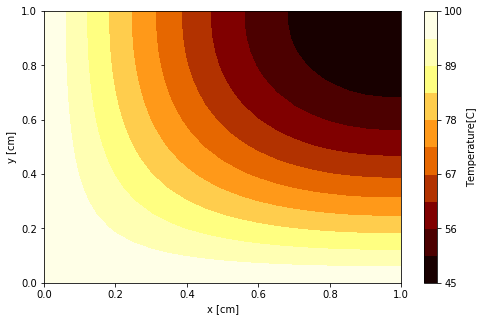

In [48]:
y_grid, x_grid = numpy.meshgrid (y, x)
pyplot.figure(figsize=(8,5))
pyplot.xlabel('x [cm]')
pyplot.ylabel('y [cm]')
levels = numpy.linspace(T.min(), T.max(), 11)
cont = pyplot.contourf(x_grid*100,y_grid*100, T, levels = levels, cmap = 'afmhot')
cbar = pyplot.colorbar(cont)
cbar.set_label('Temperature[C]')